(https://scikit-opt.github.io/scikit-opt/#/zh/README)

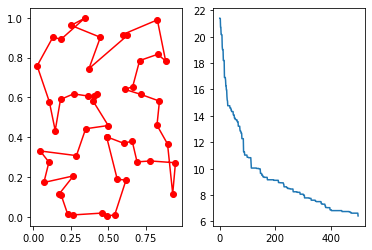

In [2]:
# 2.2 遗传算法用于旅行商问题
# GA_TSP 针对TSP问题重载了 交叉(crossover)、变异(mutation) 两个算子

# 第一步，定义问题。
# 这里作为demo，随机生成距离矩阵. 实战中从真实数据源中读取。

# -> Demo code: examples/demo_ga_tsp.py#s1

import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

# 第二步，调用遗传算法进行求解
# -> Demo code: examples/demo_ga_tsp.py#s2


from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()
# 第三步，画出结果：
# -> Demo code: examples/demo_ga_tsp.py#s3

fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()